# Comparison of the magnitude of Power emitted by the body, Power reflected by the body and Power from the atmosphere

## -1. Scrap work

In [1]:
def function(x):
    return x * 2
def function_2(f, y):
    return f(y)

In [2]:
function_2(function, 10.5)

21.0

## 0. Imports

In [3]:
import numpy as np
import sympy as smp

## 1. Numerical Integration Functions

### 1.1. The Trapezoidal Integration Method
We want to define a function that performs the approximation using the Trapezoidal rule
$$\displaystyle \int_{x_0}^{x_N} f (x) d x \approx \frac{\Delta x}{2} \Big( f (x_0) + 2 f (x_1) + 2 f (x_2) + \dots + 2 f (x_{N-1}) + f (x_N) \Big)$$
where 
$$x_k = x_{k-1} + \frac{x_N - x_0}{N}$$
and 
$$\Delta x = \frac{x_N - x_0}{N}$$

In [4]:
##################################
# Define the Trapezoidal integraion
##################################
# Copied from stack overflow but fairly simple

def trapezoidal(f, x_0, x_N, N):
    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    sum += f(x_0)/2.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        x_k = x_0 + i * delta_x
        sum += f(x_k)

    # For x_N
    sum += f(x_N)/2.0
    
    sum = sum * delta_x
    
    return sum

### 1.1.1 Tests for the trapezoidal function.
We check the following integrals
$$\displaystyle \int_{1}^{2} e^x d x = e^2 - e^1 \approx 4.67077$$
$$\displaystyle \int_{2}^{3} x e^x d x = 2 e^3 - e^2 \approx 32.78202$$
$$\displaystyle \int_{2}^{3} x^3 d x = \frac{3^4 - 2^4}{4} = 16.25 $$

In [5]:
N = 1000

#####################################
#### TEST 1 ########################
#####################################

test_1_string = r'''
    $$\displaystyle \int_{1}^{2} e^x d x =$$
'''

def integrand_1(x):
    return np.exp(x)

test_1_value = trapezoidal(integrand_1, 1, 2, N)

# print(f'{test_1_string} {test_1_value}')
print(f'Integral 1 = {test_1_value}')

#####################################
#### TEST 2 ########################
#####################################

test_2_string = r'''
    $$\displaystyle \int_{2}^{3} x e^x d x = $$
'''

def integrand_2(x):
    return x*np.exp(x)

test_2_value = trapezoidal(integrand_2, 2, 3, N)

# print(f'{test_2_string} {test_2_value}')
print(f'Integral 2 = {test_2_value}')



#####################################
#### TEST 3 ########################
#####################################

test_3_string = r'''
    $$\displaystyle \int_{2}^{3} x^3 d x = $$
'''

def integrand_3(x):
    return x**3

test_3_value = trapezoidal(integrand_3, 2, 3, N)

# print(f'{test_3_string} {test_3_value}')
print(f'Integral 3 = {test_3_value}')


####################################
#### LOOKS GOOD! ##################
###################################

Integral 1 = 4.670774659702784
Integral 2 = 32.782022595359464
Integral 3 = 16.250001250000008


### 1.2. The Simpson 1/3 Integration Method
We want to define a function that performs the approximation using Simpson's 1/3 rule
$$\displaystyle \int_{x_0}^{x_N} f (x) d x \approx \frac{\Delta x}{3} \Big( f (x_0) + 4 f (x_1) + 2 f (x_2) + 4 f (x_3) + 2 f (x_4) + \dots + 4 f (x_{N-3})+ 2 f (x_{N-2}) + 4 f (x_{N-1}) + f (x_N) \Big)$$
where 
$x_k$ and $\Delta x$ are the same as that in Trapezoidal rule (Section 1.1) and $N \: \textbf{is even!}$

In [6]:
##################################
# Define the Simpson's 1/3 integraion
##################################
# Modified from trapezoidal

def Simpson_13(f, x_0, x_N, N):

    if N % 2 != 0:
        raise Exception('N (the number of intervals) needs to be divisible by 2 (even)')
        
    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    sum += f(x_0)/3.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        if i%2 == 1: 
            sum += 4/3.0 * f(x_0 + i * delta_x)
        else:
            sum += 2/3.0 * f(x_0 + i * delta_x)

    # For x_N
    sum += f(x_N)/3.0

    sum = sum * delta_x
    
    return sum

### 1.2.1 Tests for Simpson's 1/3 rule.
We do the calculations for the same expressions as that for the Trapezoidal rule (Section 1.1, 1.1.1)

In [7]:
#######################################
#### Remember N needs to be even ##############
######################################
N = 1000

#####################################
#### TEST 1 ########################
#####################################

test_1_string = r'''
    $$\displaystyle \int_{1}^{2} e^x d x =$$
'''

def integrand_1(x):
    return np.exp(x)

test_1_value = Simpson_13(integrand_1, 1, 2, N)

# print(f'{test_1_string} {test_1_value}')
print(f'Integral 1 = {test_1_value}')

#####################################
#### TEST 2 ########################
#####################################

test_2_string = r'''
    $$\displaystyle \int_{2}^{3} x e^x d x = $$
'''

def integrand_2(x):
    return x*np.exp(x)

test_2_value = Simpson_13(integrand_2, 2, 3, N)

# print(f'{test_2_string} {test_2_value}')
print(f'Integral 2 = {test_2_value}')



#####################################
#### TEST 3 ########################
#####################################

test_3_string = r'''
    $$\displaystyle \int_{2}^{3} x^3 d x = $$
'''

def integrand_3(x):
    return x**3

test_3_value = Simpson_13(integrand_3, 2, 3, N)

# print(f'{test_3_string} {test_3_value}')
print(f'Integral 3 = {test_3_value}')


####################################
#### LOOKS GOOD! ##################
###################################

Integral 1 = 4.670774270471628
Integral 2 = 32.78201774744518
Integral 3 = 16.250000000000014


### 1.3. The Simpson 3/8 Integration Method
We want to define a function that performs the approximation using Simpson's 3/8 rule
$$\displaystyle \int_{x_0}^{x_1} f (x) d x \approx \frac{3 \Delta x}{8} \Big( f (x_0) + 3 f (x_1) + 3 f (x_2) + 2 f (x_3) + 3 f (x_4) + 3 f (x_5) + 2 f (x_6) + \dots + 3 f (x_{N-5}) + 3 f (x_{N-4}) + 2 f (x_{N-3}) + 3 f (x_{N-2})+ 3 f (x_{N-1}) + f (x_N) \Big)$$
where 
$x_k$ and $\Delta x$ are the same as that in Trapezoidal rule (Section 1.1) and $N \: \textbf{is divisible by 3!}$

In [8]:
##################################
# Define the Simpson's 1/3 integraion
##################################
# Modified from trapezoidal

def Simpson_38(f, x_0, x_N, N):

    if N % 3 != 0:
        raise Exception('N (the number of intervals) needs to be divisible by 3')
        
    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    sum += 3 * f(x_0)/8.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        if i%3 != 0: 
            sum += 3 * 3 * f(x_0 + i * delta_x) / 8.0
        else:
            sum += 3 * 2 * f(x_0 + i * delta_x) / 8.0

    # For x_N
    sum += 3 * f(x_N)/8.0

    sum = sum * delta_x
    
    return sum

### 1.3.1 Tests for Simpson's 3/8 rule.
We do the calculations for the same expressions as that for the Trapezoidal rule (Section 1.1, 1.1.1)

In [9]:
#######################################
#### Remember N needs to be divisible by 3 ##############
######################################
N = 9999

#####################################
#### TEST 1 ########################
#####################################

test_1_string = r'''
    $$\displaystyle \int_{1}^{2} e^x d x =$$
'''

def integrand_1(x):
    return np.exp(x)

test_1_value = Simpson_38(integrand_1, 1, 2, N)

# print(f'{test_1_string} {test_1_value}')
print(f'Integral 1 = {test_1_value}')

#####################################
#### TEST 2 ########################
#####################################

test_2_string = r'''
    $$\displaystyle \int_{2}^{3} x e^x d x = $$
'''

def integrand_2(x):
    return x*np.exp(x)

test_2_value = Simpson_38(integrand_2, 2, 3, N)

# print(f'{test_2_string} {test_2_value}')
print(f'Integral 2 = {test_2_value}')



#####################################
#### TEST 3 ########################
#####################################

test_3_string = r'''
    $$\displaystyle \int_{2}^{3} x^3 d x = $$
'''

def integrand_3(x):
    return x**3

test_3_value = Simpson_38(integrand_3, 2, 3, N)

# print(f'{test_3_string} {test_3_value}')
print(f'Integral 3 = {test_3_value}')


####################################
#### LOOKS GOOD! ##################
###################################

Integral 1 = 4.670774270471601
Integral 2 = 32.782017747444755
Integral 3 = 16.24999999999996


## 2. Numerical integration with symbolic expressions

### 2.1 Expression for Planck's Law
I was confused by $2 \pi$ and factors of $c$'s and the various quantities discussed in representation of the Planck distribution. To avoid confusion, now I am following the notaion and expressions used in:

$\textbf{6. Electromagnetic raditaion. AST1100 – Introduction to astrophysics, Lecture Notes. University of Oslo}$

$$\displaystyle B(\nu, T) = \frac{2 h \nu^3}{c^2} \frac{1}{\displaystyle \mathrm{exp} \: \left(\frac{h \nu}{k_B T}\right) - 1}$$

The quantity $B(\nu, T)$, $\textbf{The Spectral Intensity}$ is defined such that,
$$\Delta E = B(\nu) \mathrm{cos} \theta \Delta \nu \Delta A \Delta \Omega \Delta t$$

is the small energy passing through a small area $\Delta A$ into a small solid
angle $\Delta \Omega$ per small time interval $\Delta t$ in the small frequency range $\left[\nu, \nu + \Delta \nu \right]$. Intensity is measured in units of W m$^{-2}$ sr$^{-1}$ Hz$^{-1}$

Some other quantities are often defined.
1. Flux (or total Flux)

$$F = \frac{d E}{d A \: d t}$$
is the total energy received per area per time.

2. Flux per frequency

$$F (\nu) = \frac{d E}{d A \: d t \: d \nu}$$
is the flux at a certain frequency.

3. Luminosity
$$F = \frac{d E}{d t}$$
is the energy received per time; i.e. the power, which should be the quantity most useful to us.

4. Luminosity per frequency
$$F = \frac{d E}{d t \: d \nu}$$
is the luminosity at a certain frequency.

The quantity $B(\lambda, T)$, The Spectral Intensity as a function of the wavelength is obtained from $B(\nu, T)$, and is given by
$$\displaystyle B(\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{\displaystyle \mathrm{exp} \: \left(\frac{h c}{\lambda k_B T}\right) - 1}$$ 
the units for which is given by  W m$^{-2}$ sr$^{-1}$ m$^{-1}$
$$\Delta E = B(\lambda) \mathrm{cos} \theta \Delta \lambda \Delta A \Delta \Omega \Delta t$$

### 2.2 Defining the Constants
Let's take the following values.
$$h = 6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1}$$
taken from the Wikipedia article on: Planck Constant 
$$c = 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1} $$
taken from the  Wikipedia article on: Speed of Light
$$k_B = 1.380649 \times 10^{-23} \: \mathrm{J \: K}^{-1}$$
taken from the Wikipedia article on: Boltzmann constant 

Two radiation constants are defined to make the simplifications. It seems that the constants are defined to make simplifications in the wavelength parametrization. Let's index them with lambda subscript.

The first radiation constant
$$c_{1\lambda} = 2 h c^2 = 2 \times 6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} \times  \left( 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1} \right)^2 = 1.1910429723971884 \times 10^{-16} \: \mathrm{J \: s}^{-1} \: \mathrm{m}^2$$

The second radiation constant
$$c_{2\lambda} = \frac{h c}{k_B} = \frac{6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} \times 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1}}{1.380649 \times 10{-23} \: \mathrm{J \: K}^{-1}} = 1.4387768775039337 \times 10^{-2} \: \mathrm{m \: K}$$

Likewise we can define two constants for the frequency parametrization, and use a nu subscript.

The first radiation constant
$$c_{1\nu} = \frac{2 h}{c^2} = \frac{2 \times 6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} }{\left( 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1} \right)^2 }= 1.4744994647625417 \times 10^{-50} \: \mathrm{J \: m}^{-2} \: \mathrm{s}^3$$

The second radiation constant
$$c_{2\nu} = \frac{h}{k_B} = \frac{6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} }{1.380649 \times 10{-23} \: \mathrm{J \: K}^{-1}} =  4.799243073366221 \times 10^{-11} \: \mathrm{K \: s}^{-1}$$

In [10]:
#########################
# 1. Planck Constant ###
#########################
h = 6.62607015 * (10**(-34))

##########################
# 2. Speed of Light ####
##########################
c = 2.99792458 * (10**(8))

##########################
# 3. Boltzmann constant
#########################
k_B = 1.380649 * (10**(-23))

###########################
# 4. First radiation constant in wavelength(lambda) parametrization
###########################
c_1_lambda = 2 * h * c**2

###########################
# 5. Second radiation constant in wavelength(lambda) parametrization
###########################
c_2_lambda =  h * c / k_B

###########################
# 6. First radiation constant in frequency(nu) parametrization
###########################
c_1_nu = 2 * h / (c**2)

###########################
# 7. Second radiation constant in frequency(nu) parametrization
###########################
c_2_nu =  h / k_B

### 2.3 Define symbolic expressions for integration

In [11]:
T_couple = smp.Symbol('T_couple')
lambda_ = smp.Symbol('lambda_')

In [12]:
B_lambda_T = (c_1_lambda / (lambda_ **5 )) * (1/( smp.exp(c_2_lambda/ (lambda_ * T_couple)) - 1) )

In [13]:
B_lambda_T

1.19104297239719e-16/(lambda_**5*(exp(0.0143877687750393/(T_couple*lambda_)) - 1))

#### 2.3.1 Read Dummy Data
For now, we will read the dummy data file, GlobalTemperaturesRefined.csv which has 1 column of data consisting of the first column from the dataset https://github.com/sn2606/Global-Temperature-Time-Series/blob/master/GlobalTemperatures.csv , after the NaN values are droppped off.

In [14]:
T_couple_s = np.genfromtxt('GlobalTemperaturesRefined.csv', delimiter=',')

In [15]:
T_couple_s

array([ 3.034,  3.083,  5.626, ..., 10.801,  7.433,  5.518])

Let's assume that the data from one thermocouple will be this way. The data from multiple thermocouples could be separated into this format.

In [16]:
B_lambda_T_s = []

In [17]:
for i in range(np.size(T_couple_s)):
    B_lambda_T_s.append(B_lambda_T.subs(T_couple, T_couple_s[i]))

In [18]:
B_lambda_T_s

[1.19104297239719e-16/(lambda_**5*(exp(0.00474217823831224/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.0046668079062729/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00255737091628854/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00169467241166541/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00124321859284882/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00111214105086491/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00090671595506928/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.000975441950850125/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.0012606473998983/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00225974065887221/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00519039277598822/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00576664079159893/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.0149405698598539/lambda_) - 1)),
 1.19104297239719e-16/(lamb

In [19]:
np.size(B_lambda_T_s)

3180

#### 2.3.2 Integrate at each Temperature

In [20]:
def evaluate_to_apply(sympy_expression):
    '''
    This function takes in a sympy expression in the varaible lambda_ and 
    returns a function that substitutes the value for lambda_ for a given argument.
    '''
    return (lambda x : sympy_expression.subs(lambda_, x))

In [21]:
B_lambda_T_s_integrated = []

In [22]:
import datetime

In [23]:
lambda_0 = 780 * 10 **(-9) # 780 nm
lambda_1 = 1 * 10 **(-3) # 1 mm
N = 10 **(1) # 1 million points
start_time = datetime.datetime.now()
for i in range(np.size(B_lambda_T_s)):
    B_lambda_T_s_integrated.append(trapezoidal(evaluate_to_apply(B_lambda_T_s[i]), lambda_0, lambda_1, N))
finish_time = datetime.datetime.now()
print(finish_time - start_time)

0:00:17.535090


# Takes about 20 seconds to run integration for 10 points. That is about 2 seconds for one temperature. NOT GOOD!
Let's try without using smbolic substitution in the next section.

In [24]:
B_lambda_T_s_integrated

[4.29441604876256e-7,
 4.75797740646122e-7,
 1.27028564992653e-5,
 8.20124677630383e-5,
 0.000302607214533344,
 0.000477697415767368,
 0.00110524485768993,
 0.000817217403813562,
 0.000285741506734555,
 2.27152262459311e-5,
 2.36236634541901e-7,
 1.12351067981151e-7,
 3.49986721178430e-12,
 1.46866793268740e-5,
 5.26012461225055e-5,
 0.000626977780032640,
 0.000741503025430433,
 0.000216483495572725,
 6.81993890137678e-24,
 1.47588394526531e-5,
 7.29867601328538e-5,
 5.79041440840593e-5,
 4.31450259616141e-5,
 7.76946647169467e-6,
 2.29211613965105e-8,
 1.52401108206659e-14,
 1.06513588974085e-5,
 7.32561428744448e-5,
 0.000374035119941361,
 0.000780288558442743,
 0.000898124858508401,
 0.000688743697635647,
 0.000538507288426350,
 0.000103540053060715,
 9.99087426220540e-6,
 4.75661853116438e-17,
 2.01051361895466e-9,
 -20610358212.8292,
 1.38098578716212e-6,
 0.000306608583017366,
 0.000343558861160321,
 0.000737919133519773,
 0.000801611740313851,
 0.000578226170207757,
 0.000257505

### 2.4 Integration without symbolic substitution

In [25]:
def B_lambda_T_s_at_T(some_T_couple_s):
    '''
    This function takes in a list/numpy array of thermocouple temperatures at various frames: some_T_couple_s
    and returns a list (at/for each temperature in the list some_T_couple_s) of 
    lambda/anonymous functions that take in a wavelength and give you the value of B_lambda_T at that wavelength

    i.e. They plug in the temperature and give a function that has the wavelength yet to be plugged in.

    When this list of lambda/anonymous functions are later passed to the integrator functions like trapezoidal,
    they will use these functions to get the value of B_lambda_T at each wavelength they need.
    '''
    B_lambda_T_s = []
    for i in range(np.size(some_T_couple_s)):

        ####################################
        #### For testing ###################
        ####################################
        
        # print(f'Now I will print {i}')
        # print( (c_1_lambda / (1 **5)) * (1 / (np.exp(c_2_lambda / (1 * some_T_couple_s[i])) - 1) ) )
        #####################################
        
        ########################################################################
        ####### Be careful with lambda taking variable in the loop #############
        ####### pass it as a default argument ##################################
        ########################################################################
        
        B_lambda_T_s.append(lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )
                            
    return B_lambda_T_s

In [26]:
B_lambda_T_s_integrated = []

In [27]:
lambda_0 = 780 * 10 **(-9) # 780 nm
lambda_1 = 1 * 10 **(-3) # 1 mm
N = 10 **(4) # 1 million points
start_time = datetime.datetime.now()

#T_couple_s = 100 * T_couple_s
T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
for i in range(np.size(T_couple_s_at_T)):
    B_lambda_T_s_integrated.append(trapezoidal(T_couple_s_at_T[i], lambda_0, lambda_1, N))

finish_time = datetime.datetime.now()

print(finish_time - start_time)

# 10000 points integration with trapezoidal rule takes about 30 seconds for the array.

/tmp/ipykernel_9178/3191141826.py:28: RuntimeWarning: overflow encountered in exp
  B_lambda_T_s.append(lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )


0:00:32.370542


In [28]:
print(T_couple_s_at_T[8](1))

9.441913635938301e-14


In [29]:
B_lambda_T_s_integrated

[4.2963359493502403e-07,
 4.7607347399245066e-07,
 1.2722759035983255e-05,
 8.198222471180692e-05,
 0.0003043066765637097,
 0.00048260126287148227,
 0.00111364780964324,
 0.0008266107357570417,
 0.00028717811328610323,
 2.274465991957248e-05,
 2.3611655507340726e-07,
 1.1210737932259794e-07,
 3.181798194323835e-12,
 1.470908002863269e-05,
 5.2612286519673496e-05,
 0.0006344358735957217,
 0.000750347488213521,
 0.00021702845448331803,
 3.4343718373675375e-24,
 1.4781326123986423e-05,
 7.296765076278938e-05,
 5.790743209025608e-05,
 4.3167850952918686e-05,
 7.782255271483645e-06,
 2.2744629298451725e-08,
 1.256697006325988e-14,
 1.0668436116957763e-05,
 7.323666363528433e-05,
 0.0003769778470680723,
 0.0007894535182570223,
 0.0009077444130373821,
 0.0006970266699440087,
 0.0005445246646299209,
 0.00010349936461706948,
 1.0006997800947251e-05,
 3.457990479836291e-17,
 1.9664244335480386e-09,
 -82618791.77057777,
 1.3830221736888366e-06,
 0.000308372512652451,
 0.000345950236224528,
 0.000

In [30]:
#########################################
# Let's make this into a functuib ######
########################################
def integrated_B_blackbody(T_couple_s, lambda_0, lambda_1, N):
    '''
    Arguments:
    T_couple_s : This is the list of thermocouple temperature data at each frame, and is close to the directly read data 
    (lambda_0, lambda_1): The bandwidth for integration
    N: Number of points for integration with the trapezoidal rule
    N = 10000 is reasonable for now

    Returns: B. the intensity for a black body, since we have not multiplied by emissivity
    '''
    # This will be the list of integraed B_lambda_T over the wavelength at each T_couple
    B_lambda_T_s_integrated = []

    T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
    for i in range(np.size(T_couple_s_at_T)):

        #######################################################################
        # The trapezoidal integration is explicitly used here
        # For other integration functions, this would need to be replaced
        ########################################################################
        B_lambda_T_s_integrated.append(trapezoidal(T_couple_s_at_T[i], lambda_0, lambda_1, N))

    return B_lambda_T_s_integrated

In [32]:
blackbody_spectrum = integrated_B_blackbody(T_couple_s, 10**(-10), 10**10, 1000) 

/tmp/ipykernel_9178/3191141826.py:28: RuntimeWarning: overflow encountered in exp
  B_lambda_T_s.append(lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )


In [33]:
print(f"The blackbody spectrum at temperature {T_couple_s[0]} K is about {blackbody_spectrum[0]}")

The blackbody spectrum at temperature 3.0340000000000003 K is about 2.718357478164006e-35


In [34]:
T_couple_s = [1000, 10000, 100000, 1000000]
lambda_0_s = 10 ** np.linspace(-15, 3, 1000)
my_array_shape = ( len(lambda_0_s), len(T_couple_s) )
Blackbody_Curves = np.zeros(my_array_shape)
N = 1000
for i in range(len(lambda_0_s)):
    lambda_0 = lambda_0_s[i]
    lambda_1 = lambda_0 + 1.0000000001
    Blackbody_Curves[i] = integrated_B_blackbody(T_couple_s, lambda_0, lambda_1, N)

/tmp/ipykernel_9178/3191141826.py:28: RuntimeWarning: overflow encountered in exp
  B_lambda_T_s.append(lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )


In [40]:
# At various Temperatures, now we have B for various lambdas (integrated in lambda, [lambda + small amount] range)
new_array_shape = ( len(T_couple_s), len(lambda_0_s) )
new_arrangement = np.zeros(new_array_shape)
for i in range(np.shape(Blackbody_Curves)[0]):
    at_current_lambda = Blackbody_Curves[i]
    for j in range(np.size(at_current_lambda)):
        new_arrangement[j][i] = at_current_lambda[j]

In [37]:
np.shape(Blackbody_Curves)

(1000, 4)

In [41]:
np.shape(new_arrangement)

(4, 1000)

In [42]:
Blackbody_Curves

array([[8.89804231e-03, 8.95347463e-02, 8.95903080e-01, 8.95958655e+00],
       [8.89804231e-03, 8.95347463e-02, 8.95903080e-01, 8.95958655e+00],
       [8.89804231e-03, 8.95347463e-02, 8.95903080e-01, 8.95958655e+00],
       ...,
       [1.15115835e-23, 1.15115836e-22, 1.15115837e-21, 1.15115837e-20],
       [9.75217073e-24, 9.75217079e-23, 9.75217080e-22, 9.75217076e-21],
       [8.26163431e-24, 8.26163436e-23, 8.26163440e-22, 8.26163435e-21]])

In [43]:
new_arrangement

array([[8.89804231e-03, 8.89804231e-03, 8.89804231e-03, ...,
        1.15115835e-23, 9.75217073e-24, 8.26163431e-24],
       [8.95347463e-02, 8.95347463e-02, 8.95347463e-02, ...,
        1.15115836e-22, 9.75217079e-23, 8.26163436e-23],
       [8.95903080e-01, 8.95903080e-01, 8.95903080e-01, ...,
        1.15115837e-21, 9.75217080e-22, 8.26163440e-22],
       [8.95958655e+00, 8.95958655e+00, 8.95958655e+00, ...,
        1.15115837e-20, 9.75217076e-21, 8.26163435e-21]])

In [44]:
import matplotlib.pyplot as plt

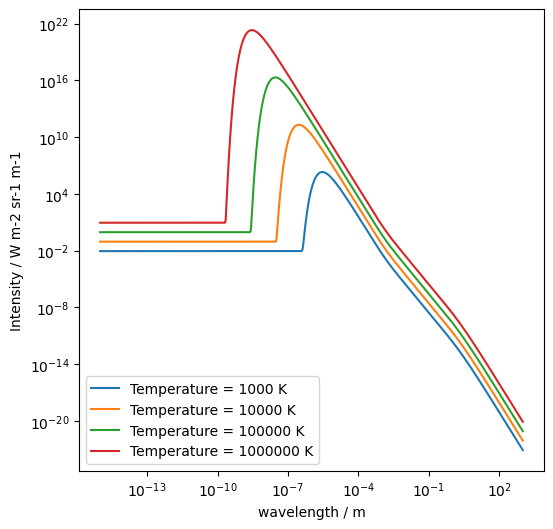

In [77]:
lambda_0_s_for_plotting = 10 ** np.linspace(-4, -2, 1000)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim([0, 15 * 10**(22)])
ax.set_xlabel('wavelength / m')
ax.set_ylabel('Intensity / W m-2 sr-1 m-1') 
for i in range(np.shape(new_arrangement)[0]):
    # ax.plot(lambda_0_s_for_plotting, new_arrangement[i], label='Temperature = '+str(T_couple_s[i]) + ' K')
    ax.plot(lambda_0_s, new_arrangement[i], label='Temperature = '+str(T_couple_s[i]) + ' K')
ax.legend()

In [48]:
np.shape(lambda_0_s)

(1000,)

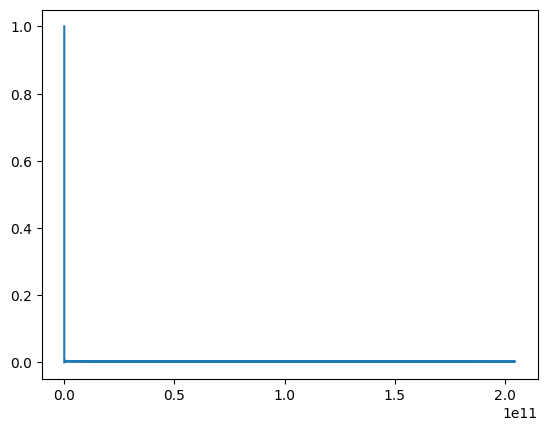

In [52]:
plt.plot(new_arrangement[1], lambda_0_s_for_plotting)

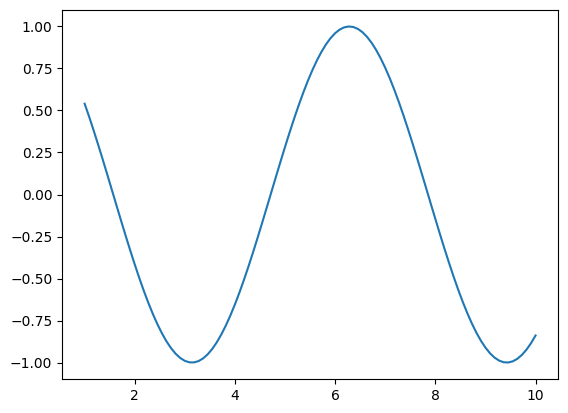

In [55]:
plt.plot(np.linspace(1,10,100), np.cos(np.linspace(1,10,100)))

In [ ]:
# Now check the curve using the un integrated form, to see if it's alright.
